# Welcome to Assignment 7

## Q1. avg shortest path and avg clutering coefficient
Reproduce the plot of Figure 5.5b, by calculating the average shortest path (⟨l⟩) and the average clustering coefficient (C) for Watts-Strogatz networks constructed for different values of the rewiring probability p. Take 20 equally spaced values of p between 0 and 1. For each value of p build 20 different networks, and compute the average of ⟨l⟩ and C. To plot the two curves on a common y-axis, you can normalize the values by dividing them by the corresponding values for p = 0.

In [1]:
%matplotlib inline
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics

In [2]:
avg_path = []
avg_clustering = []

# create a list with each p in interval [0, 1]
p_list = list(np.arange(0, 1.0, 0.05))

for p in p_list:
    shortest_path_list = [] 
    clustering_co_list = []
    
    # generate 20 different networks
    for i in range(20):
        G = nx.watts_strogatz_graph(1000,4,p) # small-world model network
        shortest_path = nx.average_shortest_path_length(G)
        shortest_path_list.append(shortest_path)
        
        clustering_co = nx.average_clustering(G)
        clustering_co_list.append(clustering_co)
    
    # calculate the average of the shortest path list for each p 
    avg_shortest_path = statistics.mean(shortest_path_list)
    avg_shortest_path_pair = (p, avg_shortest_path)
    avg_path.append(avg_shortest_path_pair)
    
    # calculate the average of the clustering list for each p 
    avg_clustering_co = statistics.mean(clustering_co_list)
    avg_clustering_co_pair = (p, avg_clustering_co)
    avg_clustering.append(avg_clustering_co_pair)    
    
# return a dictionary
avg_path = dict(avg_path)
avg_clustering = dict(avg_clustering)

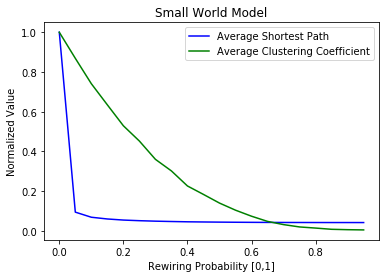

In [3]:
# rewiring probablity
x = avg_path.keys()

# normalize both values by dividing them by the corresponding values for p = 0
y1 = [i/avg_path[0] for i in list(avg_path.values())]
y2 = [i/avg_clustering[0] for i in list(avg_clustering.values())]

plt.plot(x, y1, "b", label='Average Shortest Path') 
plt.plot(x, y2, "g", label='Average Clustering Coefficient') 
plt.xlabel('Rewiring Probability [0,1]')
plt.ylabel('Normalized Value')
plt.title('Small World Model')
leg = plt.legend();

## Q2. degree distribution
Build Watts-Strogatz networks with 1,000 nodes, k = 4 and these values for the rewiring probability: p = 0.0001, 0.001, 0.01, 0.1, 1. Compute and compare their degree distributions, by plotting them in the same diagram.

In [4]:
p_list = [0.0001, 0.001, 0.01, 0.1, 1]

degree_list = []
for p in p_list:
    G = nx.watts_strogatz_graph(1000,4,p) # small-world model network
    degree_sequence = [G.degree(n) for n in G.nodes]
    degree_list.append((p, degree_sequence))
degree_dict = dict(degree_list)

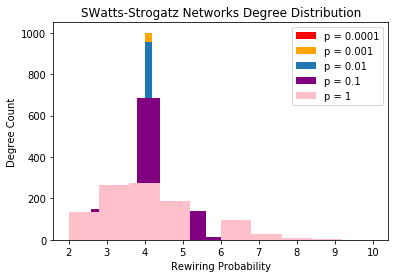

In [5]:
counts, bins, patches = plt.hist(degree_dict[0.0001], bins=10, color = "red", label='p = 0.0001')
counts, bins, patches = plt.hist(degree_dict[0.001], bins=10, color = "orange", label='p = 0.001')
counts, bins, patches = plt.hist(degree_dict[0.01], bins=10, label='p = 0.01')
counts, bins, patches = plt.hist(degree_dict[0.1], bins=10, color = "purple", label='p = 0.1')
counts, bins, patches = plt.hist(degree_dict[1], bins=10, color = "pink", label='p = 1')
plt.xlabel('Rewiring Probability')
plt.ylabel('Degree Count')
plt.title('SWatts-Strogatz Networks Degree Distribution')
leg = plt.legend();

## Q3. configuration model

Consider the `US airport network (USAN)`, which is `openflights_usa.edges`. Create a randomized version of it (RUSAN) using the configuration model. To do that, take the degree sequence of the network and apply the `nx.configuration model()` function of NetworkX. Carry out the following tasks:  

* Verify that the degree distribution is identical as the one of the USAN.  
* Compare the average shortest paths of USAN and RUSAN. How do you
interpret the difference in the values? 
* Compare the average clustering coefficients of USAN and RUSAN. How
do you interpret the difference in the values?

In [6]:
# Gernate the original graph G
G = nx.read_edgelist('data/openflights_usa.edges')
degree_sequence = [G.degree(n) for n in G.nodes]

# Gernate randomized verion of G and create a configuration model RG
RG = nx.configuration_model(degree_sequence)
degree_sequence_RG = [RG.degree(n) for n in RG.nodes]

In [7]:
# Verify that the degree distribution is identical as the one of the USAN.
degree_sequence_RG == degree_sequence

True

Therefore, the degree distribution of USAN and RUSAN is identical

In [8]:
# 1. Get the giant component of G and then calculate the avg shortest path
giant_comp_G = max(nx.connected_components(G), key = len)
GC = nx.subgraph(G, giant_comp_G)
shortest_path_GC = nx.average_shortest_path_length(GC)

shortest_path_RGC_list = []
clustering_co_RG_list = []

# 2. Generate configuration model RG for 20 times 
for i in range(20):
    RG = nx.configuration_model(degree_sequence)
    RG = nx.Graph(RG)
    
    # Get the giant component of RG and then calculate the avg shortest path
    giant_comp_RG = max(nx.connected_components(RG), key = len)
    RGC = nx.subgraph(RG, giant_comp_RG)
    shortest_path_RGC = nx.average_shortest_path_length(RGC)
    shortest_path_RGC_list.append(shortest_path_RGC)
    
    # Get the clustering coefficients of RG
    clustering_co_RG = nx.average_clustering(RG)
    clustering_co_RG_list.append(clustering_co_RG)

In [9]:
# Get the shortest path of G
print("Average shortest paths of USAN is:", shortest_path_GC)

# Get the shortest path of RG
mean_path = statistics.mean(shortest_path_RGC_list)
stdev_path = statistics.stdev(shortest_path_RGC_list)
print('Average shortest paths of 20 RUSAN Graphs is:', mean_path)
print('Standard deviation of shortest paths of 20 RUSAN Graphs is:', stdev_path)

# Use statistics values to compare the average shortest path
if shortest_path_GC < mean_path + stdev_path and shortest_path_GC > mean_path - stdev_path:
    print("Original graph is compatible within the error")
else:
    print("Original graph is not compatible within the error")

Average shortest paths of USAN is: 3.197357077335835
Average shortest paths of 20 RUSAN Graphs is: 3.0040164922150345
Standard deviation of shortest paths of 20 RUSAN Graphs is: 0.023809791517583966
Original graph is not compatible within the error


From textbook p147 [1], I learned that what we need to do is to compute the average shortest path and average clustering coefficient of a sufficient number of random configurations, derive the average and standard error, and check whether the value of the measure in the original graph is compatible with the estimate from the shuffled networks, within the error. 

Therefore, I generated 20 random configuration models above, and then use calculate the average and standard deviation of both average shortest path and clustering coefficients.

From the results shown above, we can see that the average shortest path of original graph is a little larger than the random estimate and it not campatible within one standard error. By defination, random configuration model starts with a pair of stubs is selected at random, and then the chosen stubs are joined to each other, forming a link between the nodes attached to the stubs, which indicates that the average shortest path should be decreased as more linkas are formed.

In [10]:
# Get the clustering of G
clustering_co = nx.average_clustering(G)
print("Average clustering coefficients of USAN is:", clustering_co)

# Get the clustering of RG 
mean_co = statistics.mean(clustering_co_RG_list)
stdev_co = statistics.stdev(clustering_co_RG_list)
print('Average clustering coefficients of 20 RUSAN Graphs is:', mean_co)
print('Standard Deviation clustering coefficients of 20 RUSAN Graphs is:', stdev_co)

# Use statistics values to compare the clustering
if clustering_co < mean_co + stdev_co and clustering_co > mean_co - stdev_co:
    print("Original graph is compatible within the error")
else:
    print("Original graph is not compatible within the error")

Average clustering coefficients of USAN is: 0.4930453868822472
Average clustering coefficients of 20 RUSAN Graphs is: 0.1942292401037182
Standard Deviation clustering coefficients of 20 RUSAN Graphs is: 0.011598126835025294
Original graph is not compatible within the error


From the results shown above, we can see that average clustering coefficient of original graph is much larger than the random estimate and it not campatible within the error, the linking patterns of the network cannot be random; they must result from some mechanism that favors the formation of triangles.

## Q4.  BA network
Build a BA network with 1,000 nodes and m = 3. Carry out the following tasks:
* Plot the degree distribution of the network, in double logarithmic scale.
* Calculate the average clustering coefficient. 
* Verify that the graph is connected.
* Calculate the average shortest path.


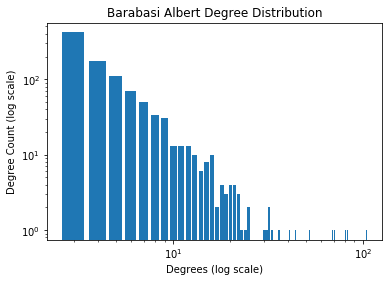

In [11]:
# barabasi_albert_graph(n, m, seed=None)
BA = nx.barabasi_albert_graph(1000, 3)
degree_sequence_BA = [BA.degree(n) for n in BA.nodes]

from collections import Counter
degree_counts_BA = Counter(degree_sequence_BA)

plt.bar(degree_counts_BA.keys(), degree_counts_BA.values())
plt.xlabel('Degrees (log scale)')
plt.xscale('log')
plt.yscale('log')
plt.ylabel('Degree Count (log scale)')
plt.title('Barabasi Albert Degree Distribution');

In [12]:
clustering_co_BA = nx.average_clustering(BA)
print("Average clustering coefficient of BA Graph is:", clustering_co_BA)

Average clustering coefficient of BA Graph is: 0.03239933984406468


In [13]:
nx.is_connected(BA)

True

The BA graph is connected

In [14]:
shortest_path_BA = nx.average_shortest_path_length(BA)
print("Average shortest path of BA Graph is:", shortest_path_BA)

Average shortest path of BA Graph is: 3.4791391391391393


## Q5. Erd ̋os-R ́enyi random graph

Build an Erd ̋os-R ́enyi random graph with the same number of nodes and links as the BA network in the previous exercise.
* Derive the degree distribution and compare it with that of the BA network, by drawing them in the same plot, in double logarithmic scale.
* Calculate the average clustering coefficient and average shortest path
length and compare them with the corresponding values for the BA network. Interpret the results.

In [15]:
M = BA.number_of_edges()
ER = nx.gnm_random_graph(1000, M)

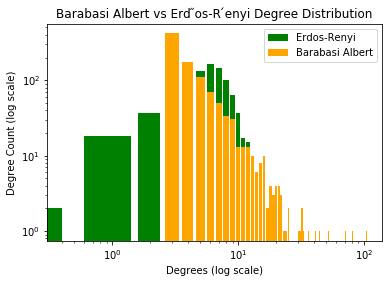

In [16]:
# Degree distribution of Erd ̋os-R ́enyi random graph
degree_sequence_ER = [ER.degree(n) for n in ER.nodes]

from collections import Counter
degree_counts_ER = Counter(degree_sequence_ER)

plt.bar(degree_counts_ER.keys(), degree_counts_ER.values(), color = "green", label='Erdos-Renyi')
plt.bar(degree_counts_BA.keys(), degree_counts_BA.values(), color = "orange", label='Barabasi Albert')

plt.xlabel('Degrees (log scale)')
plt.xscale('log')
plt.yscale('log')
plt.ylabel('Degree Count (log scale)')
plt.title('Barabasi Albert vs Erd ̋os-R ́enyi Degree Distribution')
leg = plt.legend();

In [17]:
clustering_co_ER = nx.average_clustering(ER)
print("Average clustering coefficient of ER Graph is:", clustering_co_ER)

Average clustering coefficient of ER Graph is: 0.005419730269730267


In [18]:
# Get the giant component of G and then calculate the avg shortest path
giant_comp_ER = max(nx.connected_components(ER), key = len)
ERGC = nx.subgraph(ER, giant_comp_ER)
shortest_path_ER = nx.average_shortest_path_length(ERGC)

print("Average shortest path of ER Graph is:", shortest_path_ER)

Average shortest path of ER Graph is: 4.051149440304883


In [19]:
print("Average clustering coefficient of BA Graph is:", clustering_co_BA)
print("Average clustering coefficient of ER Graph is:", clustering_co_ER)
print("Average shortest path of BA Graph is:", shortest_path_BA)
print("Average shortest path of ER Graph is:", shortest_path_ER)

Average clustering coefficient of BA Graph is: 0.03239933984406468
Average clustering coefficient of ER Graph is: 0.005419730269730267
Average shortest path of BA Graph is: 3.4791391391391393
Average shortest path of ER Graph is: 4.051149440304883


The Barab ́asi-Albert graph distribution shown above, there is a heavy-tail distribution, which confirms the existence of hubs. 

From textbook p153 [1], it states that "the BA model is a simple combination of growth and preferential attachment. At each step, a new node is added and connected to some existing nodes. The probability that a new node is attached to an old node is proportional to the degree of the old node". In this way, a node with higher degree is more likely to receive a new link than a node with lower degree. That is why clustering coefficient of the BA model is much larger than the Erd ̋os-R ́enyi random model. Then it make sense that the shortest path for BA is smaller than Erd ̋os-R ́enyi random model as from one node to another node goes needs fewer steps through one of the shortcuts or hubs in BA model. 

# Citation:

[1] A First Course in Network Science, by Filippo Menczer et al., Cambridge University Press, 2020. 